In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
   return false;
}

<IPython.core.display.Javascript object>

In [2]:
%matplotlib inline

import os
from pathlib import Path

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 10)
import matplotlib.pyplot as plt

from scripts.load_aggregated_results import PLOT_DIR, DIS_METRICS, HUMAN_READABLE_NAMES, get_metric_df

In [3]:
if not 'workbook_dir' in globals():
    workbook_dir = os.getcwd()
    os.chdir(Path(workbook_dir).parent.parent)
print('workbook_dir: ' + workbook_dir)
print('current dir: ' + os.getcwd())

workbook_dir: /home/alek/PycharmProjects/disentanglement_lib/plots/notebooks
current dir: /home/alek/PycharmProjects/disentanglement_lib


In [8]:
df = pd.read_pickle(PLOT_DIR / 'hnlpca_results.pickle')

In [9]:
df.loc[df['group_id'].str.contains('hnlpca')].groupby(['train_config.dataset.name', 'group_id']).size()

train_config.dataset.name  group_id                 
'cars3d'                   hnlpca                       300
                           hnlpca_balanced              300
'color_dsprites'           hnlpca                       300
                           hnlpca_balanced              300
                           hnlpca_balanced_intrinsic    462
                           hnlpca_intrinsic             529
'dsprites_full'            hnlpca                       300
                           hnlpca_balanced              300
'noisy_dsprites'           hnlpca                       300
                           hnlpca_balanced              300
'scream_dsprites'          hnlpca                       300
                           hnlpca_balanced              300
                           hnlpca_balanced_intrinsic    498
                           hnlpca_intrinsic             414
'shapes3d'                 hnlpca                       300
                           hnlpca_balanced     

In [10]:
print(len(df))
intrinsic_datasets = (
    'color_dsprites', 
    'scream_dsprites', 
    'smallnorb',
)
for dataset in df['train_config.dataset.name'].unique():
    if dataset.replace("'", '') in intrinsic_datasets:
        continue
    
    for group_id in (
        'hnlpca',
        'hnlpca_balanced',
    ):
        new_rows = df.loc[
            (df['train_config.dataset.name'] == dataset) &
            (df['group_id'] == group_id)
        ].copy()
        new_rows['group_id'] += '_intrinsic'
        
        df = pd.concat([df, new_rows])
        
print(len(df))

74482
76882


In [31]:
df_contribs = pd.read_csv(PLOT_DIR / 'contribs_full_color_dims.csv')

In [32]:
contribs_col_names = (
    'diffs',
    'diffs_all',
    'variances',
    'variances_all',
)
for col_name in contribs_col_names:
    df_contribs[col_name] = df_contribs.apply(
        lambda row: np.fromstring(row[col_name].replace('[', '').replace(']', ''), sep=' '),
        axis=1,
    )
for col_name in contribs_col_names:
    df_contribs[f'std_{col_name}'] = df_contribs.apply(
        lambda row: row[col_name].std(),
        axis=1,
    )

In [33]:
df_contribs

,dataset,diffs,diffs_all,variances,variances_all,std_diffs,std_diffs_all,std_variances,std_variances_all
0,dsprites_full,"[0.7924798, 0.39387174, 0.21410312, 0.2921085,...","[0.7924798, 0.39387174, 0.21410312, 0.2921085,...","[0.17043662, 0.25081086, 0.19187606, 0.6594006...","[0.17043662, 0.25081086, 0.19187606, 0.6594006...",0.205789,0.205789,0.224762,0.224762
1,color_dsprites,"[0.00235421, 0.79537514, 0.38898202, 0.2153405...","[0.79537514, 0.38898202, 0.21534056, 0.2910940...","[0.01270697, 0.17085869, 0.2474353, 0.19183103...","[0.17085869, 0.2474353, 0.19183103, 0.65982999...",0.251329,0.206940,0.253806,0.225298
2,noisy_dsprites,"[0.45468359, 0.44726903, 0.44370918, 0.4451544...","[0.45468359, 0.44726903, 0.44370918, 0.4451544...","[0.3264995, 0.41041964, 0.47402903, 0.50014432...","[0.3264995, 0.41041964, 0.47402903, 0.50014432...",0.003912,0.003912,0.066514,0.066514
3,scream_dsprites,"[0.18869556, 0.75053798, 0.36957635, 0.2034962...","[0.75053798, 0.36957635, 0.20349626, 0.2734802...","[0.51058025, 0.08076045, 0.11782191, 0.0907688...","[0.08076045, 0.11782191, 0.0907688, 0.30916492...",0.178640,0.195067,0.179590,0.104170
4,smallnorb,"[0.16428326, 0.10688019, 0.01381377, 0.0892371...","[0.16428326, 0.01381377, 0.08923717, 0.97643922]","[0.20355376, 0.14946828, 0.0752942, 0.19641723...","[0.20355376, 0.0752942, 0.19641723, 0.94444489]",0.356412,0.387890,0.318602,0.344153
5,cars3d,"[0.29775715, 0.43609607, 0.84921193]","[0.29775715, 0.43609607, 0.84921193]","[0.28291616, 0.67647422, 0.67995668]","[0.28291616, 0.67647422, 0.67995668]",0.234261,0.234261,0.186351,0.186351
6,shapes3d,"[0.62664961, 0.63682507, 0.2368502, 0.11894065...","[0.62664961, 0.63682507, 0.2368502, 0.11894065...","[0.66320729, 0.68394356, 0.2535421, 0.10878403...","[0.66320729, 0.68394356, 0.2535421, 0.10878403...",0.229537,0.229537,0.260322,0.260322


In [14]:
for col_name in contribs_col_names:
    df[f'dataset_std_{col_name}'] = df.apply(
        lambda row: float(
            df_contribs.loc[df_contribs['dataset'] == row['train_config.dataset.name'].replace("'", '')][f'std_{col_name}']
        ),
        axis=1,
    )
    
df_ = df.copy()

In [15]:
df['group_id'].unique()

array(['annealed_10.0', 'annealed_100.0', 'annealed_25.0', 'annealed_5.0',
       'annealed_50.0', 'annealed_75.0', 'beta_vae_1.0', 'beta_vae_16.0',
       'beta_vae_2.0', 'beta_vae_4.0', 'beta_vae_6.0', 'beta_vae_8.0',
       'hnlpca', 'hnlpca_balanced', 'hnlpca_balanced_intrinsic',
       'hnlpca_intrinsic'], dtype=object)

In [16]:
def get_corrs(group_id, contribs_col_name='dataset_std_variances_all'):
    df = df_.copy()
    df = df.loc[df['group_id'] == group_id]
    
    corrs = {}
    for metric in DIS_METRICS:
        df_metric, metric_col_name = get_metric_df(df, metric)
        corrs[HUMAN_READABLE_NAMES[metric]] = df_metric[
            [metric_col_name, contribs_col_name]].corr()[metric_col_name][contribs_col_name]
        
    return corrs
    

In [17]:
for group_id in df_['group_id'].unique():
    print(group_id)
    print(get_corrs(group_id))

annealed_10.0
{'FactorVAE Score': 0.25556363548697225, 'MIG': 0.6123562784839821, 'DCI Disentanglement': 0.500044534181542, 'Modularity': 0.5798047041254996, 'SAP Score': 0.808036440243549}
annealed_100.0
{'FactorVAE Score': 0.25825779966041984, 'MIG': 0.2716517653607151, 'DCI Disentanglement': 0.5673388152298003, 'Modularity': 0.5415140705112682, 'SAP Score': 0.4642929670584847}
annealed_25.0
{'FactorVAE Score': 0.36825198526676817, 'MIG': 0.48865023492501625, 'DCI Disentanglement': 0.4501125272740581, 'Modularity': 0.5259230425555103, 'SAP Score': 0.7822190908274064}
annealed_5.0
{'FactorVAE Score': 0.22395795697818427, 'MIG': 0.5945026800290537, 'DCI Disentanglement': 0.4694005790831427, 'Modularity': 0.5892583837279302, 'SAP Score': 0.7717693345154873}
annealed_50.0
{'FactorVAE Score': 0.30722551930950825, 'MIG': 0.4427720030741568, 'DCI Disentanglement': 0.5521638503004623, 'Modularity': 0.5136856680449066, 'SAP Score': 0.6121705627517826}
annealed_75.0
{'FactorVAE Score': 0.26916

In [21]:
beta_vae_corrs = []
for group_id in df_['group_id'].unique():
    if 'beta_vae' in group_id:
        corrs = get_corrs(group_id)
        corrs['beta'] = float(group_id.split('_')[-1])
        beta_vae_corrs.append(corrs)

beta_vae_corrs = pd.DataFrame(beta_vae_corrs)
beta_vae_corrs

,FactorVAE Score,MIG,DCI Disentanglement,Modularity,SAP Score,beta
0,0.445276,0.787184,0.893526,0.493872,0.788629,1.0
1,0.095113,0.484643,0.322192,0.413676,0.779518,16.0
2,0.311482,0.769282,0.798612,0.683980,0.809371,2.0
3,0.159107,0.613124,0.500627,0.623461,0.761565,4.0
4,-0.059889,0.527998,0.404060,0.529423,0.744370,6.0
5,-0.072222,0.504488,0.324571,0.535386,0.735104,8.0


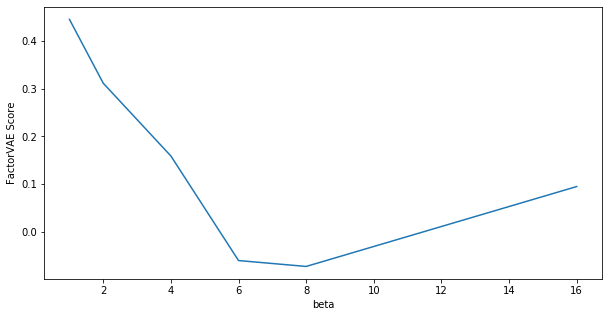

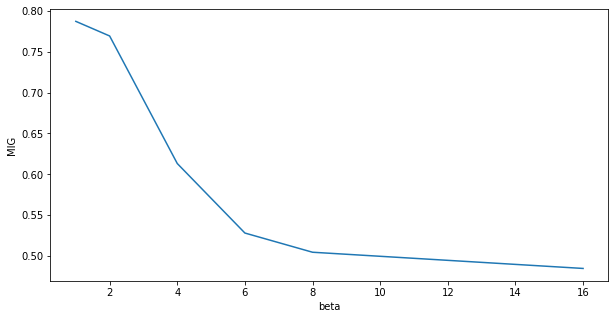

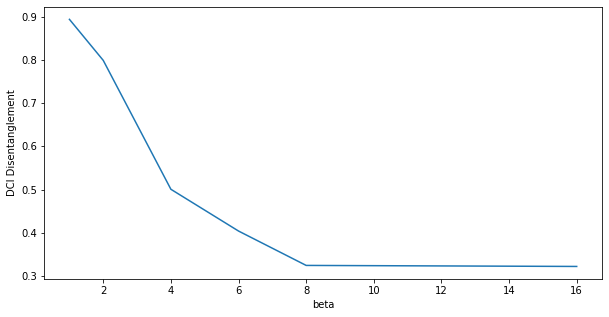

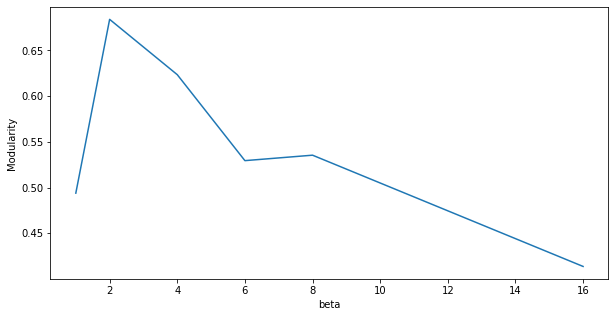

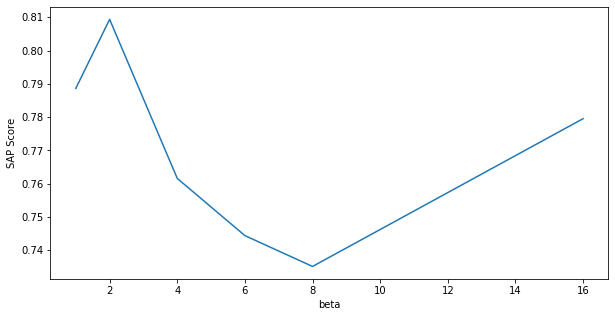

In [25]:
matplotlib.rcParams['figure.figsize'] = (10, 5)

for metric in DIS_METRICS:
    sns.lineplot(
        data=beta_vae_corrs,
        x='beta',
        y=HUMAN_READABLE_NAMES[metric],
    )
    plt.show()

dsprites_full 0.2247621907012718


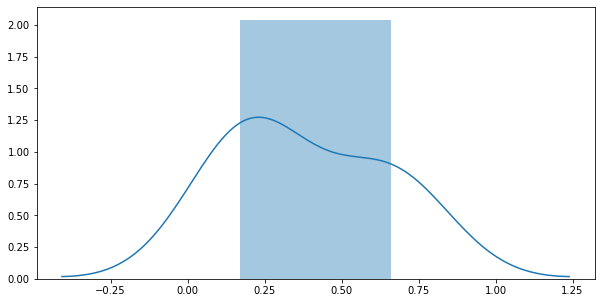

color_dsprites 0.2252982218925509


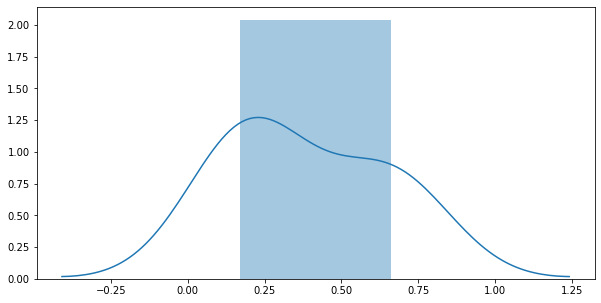

noisy_dsprites 0.06651363176180305


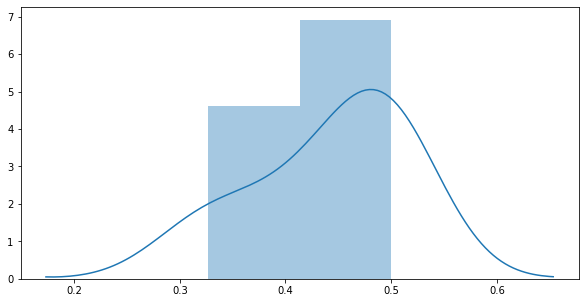

scream_dsprites 0.10417041585163554


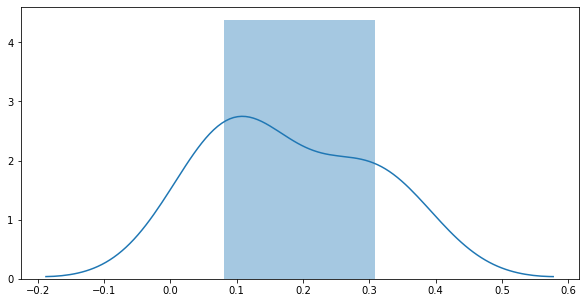

smallnorb 0.3441529639703692


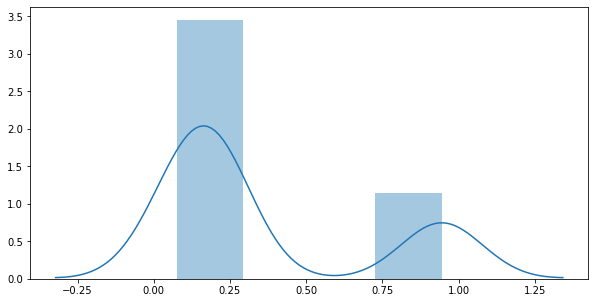

cars3d 0.18635129568773703


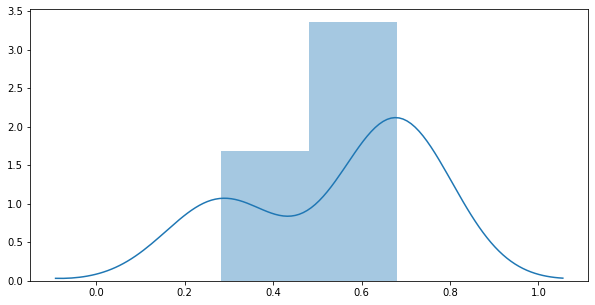

shapes3d 0.26032245743184007


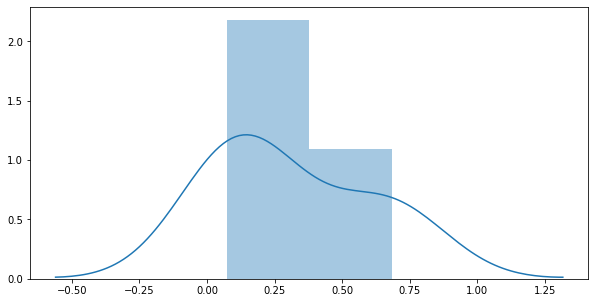

In [42]:
for dataset in df_contribs['dataset'].unique():
    contribs_dataset = df_contribs.loc[df_contribs['dataset'] == dataset].iloc[0]
    sns.distplot(
        contribs_dataset['variances_all'],
        label=dataset,
    )
    print(dataset, contribs_dataset['std_variances_all'])
    plt.show()

In [62]:
import scipy.spatial.distance as sc_dist


def average_min_dist(arr):
    min_dists = []
    for i in range(len(arr)):
        dists = []
        for j in range(len(arr)):
            if i == j:
                continue
            dists.append(np.power(arr[i] - arr[j], 2))
        
        min_dists.append(min(dists))
    
    return sum(min_dists) / len(min_dists)


for dataset in df_contribs['dataset'].unique():
    contribs_dataset = df_contribs.loc[df_contribs['dataset'] == dataset].iloc[0]
    variances = contribs_dataset['variances_all']
    
    print(dataset, average_min_dist(variances))

dsprites_full 0.0008791173544938002
color_dsprites 0.0007948522263681798
noisy_dsprites 0.00235375030699676
scream_dsprites 0.0001901980570484201
smallnorb 0.1409230787574849
cars3d 0.05163740054875559
shapes3d 0.0038148711519024655


In [ ]:
def plot_violin(group_id, contribs_col_name='dataset_std_variances_all'):
    df = df_.copy()
    df = df.loc[df['group_id'] == group_id]
    
    for metric in DIS_METRICS:
        df_metric, metric_col_name = get_metric_df(df, metric)
        sns.violinplot(
            data=df_metric,
            x=contribs_col_name,
            y=metric_col_name,
            hue='train_config.dataset.name',
        )
        plt.show()
        

In [ ]:
plot_violin('beta_vae_1.0')

In [ ]:
plot_violin('hnlpca', 'dataset_std_variances_all')